In [20]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

os.makedirs('./final_figs', exist_ok=True)

In [37]:
def plot_vector(
    vector,
    xlabel,
    ylabel,
    title,
    save_path,
    dot_color = 'red',
    line_color = 'blue',
    line_alpha = 0.4,
    yrange = None,
):
    channels = np.arange(vector.shape[0])

    fig, ax = plt.subplots(figsize=(5, 5))

    # plot dots
    ax.plot(channels, vector, 'o', color = dot_color, markersize=1)

    # plot line
    for i in range(len(channels)):
        ax.plot([channels[i], channels[i]], [0, vector[i]], '-', linewidth=0.5, alpha=line_alpha, color=line_color)

    # set y range to be [0, 1]
    if yrange is not None:
        ax.set_ylim(yrange)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.savefig(save_path)

In [40]:
outlier_stats = torch.load('outlier_stats/3_sigma/llama-7b-meta_outlier.pt')

for k, v in outlier_stats.items():
    print(k)

LAYER_ID = 16
layers = [
    f"model.layers.{LAYER_ID}.input_layernorm",
    f"model.layers.{LAYER_ID}.post_attention_layernorm",
    f"model.layers.{LAYER_ID}.self_attn.o_proj",
    f"model.layers.{LAYER_ID}.mlp.down_proj",
]

model.layers.0.input_layernorm
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.qkt_matmul
model.layers.0.self_attn.pv_matmul
model.layers.0.self_attn.o_proj
model.layers.0.post_attention_layernorm
model.layers.0.mlp.gate_proj
model.layers.0.mlp.up_proj
model.layers.0.mlp.down_proj
model.layers.1.input_layernorm
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.qkt_matmul
model.layers.1.self_attn.pv_matmul
model.layers.1.self_attn.o_proj
model.layers.1.post_attention_layernorm
model.layers.1.mlp.gate_proj
model.layers.1.mlp.up_proj
model.layers.1.mlp.down_proj
model.layers.2.input_layernorm
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.self_attn.qkt_matmul
model.layers.2.self_attn.pv_matmul
model.layers.2.self_attn.o_proj
model.layers.2.post_attention_layernorm
model.layers.2.mlp.g

In [43]:
for layer_name in layers:
    category = 'output' if 'norm' in layer_name else 'input'
    outlier_ratio = outlier_stats[layer_name][category]['outlier_ratio']

    plot_vector(
        outlier_ratio,
        'channel',
        'outlier ratio',
        f'{layer_name}',
        f'final_figs/{layer_name}_outlier_ratio.jpg',
        dot_color = 'red',
        line_color = 'purple',
        line_alpha=0.4,
        yrange=[0, 1],
    )

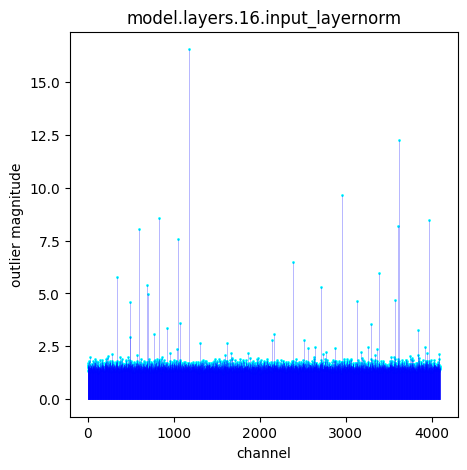

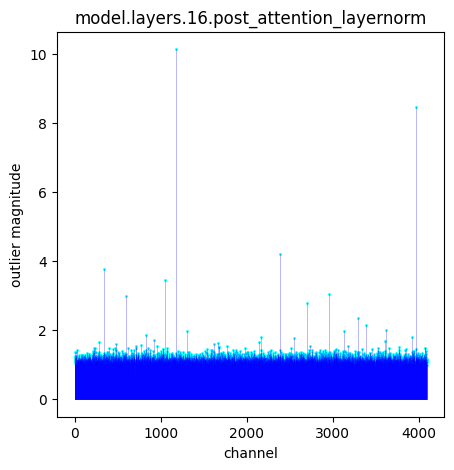

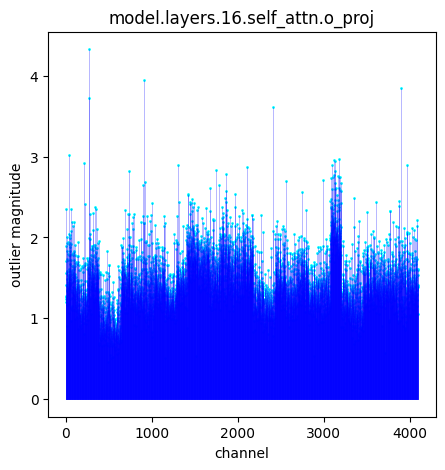

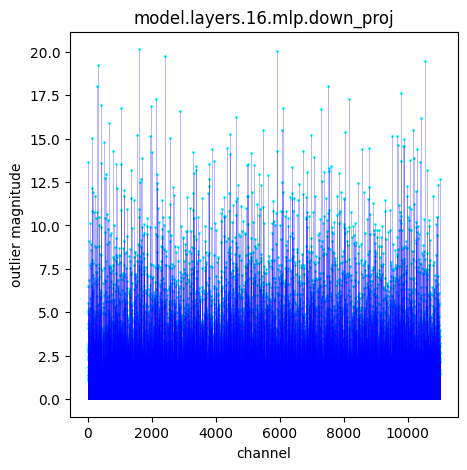

In [ ]:
for layer_name in layers:
    category = 'output' if 'norm' in layer_name else 'input'
    outlier_magnitude = outlier_stats[layer_name][category]['channel_max']

    plot_vector(
        outlier_magnitude,
        'channel',
        'outlier magnitude',
        f'{layer_name}',
        f'final_figs/{layer_name}_outlier_magnitude.jpg',
        dot_color = 'cyan',
        line_color = 'blue',
        line_alpha=0.4,
        yrange=None,
    )